#  KNN

> Réaliser par Mohamed ELFILALI

## Manipulation de la base de données MNIST

Dans cette partie on va essayer de voir et comprendre les données de la base de données MNIST fourni par SKLEARN.

### Visualisation

On commence par charger les bibliothèques dédiées pour visualiser nos données.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn import model_selection
from sklearn import neighbors
import numpy as np
from sklearn import metrics
import warnings; 
warnings.simplefilter('ignore')

mnist = datasets.fetch_mldata('MNIST original')


La fonction PRINT on lui attribuant MNIST comme paramètre permet de visualiser le contenue de notre DATASET. En revanche la fonction LEN nous donne le nombre des éléments de notre DATASET

In [2]:
print("Les éléments de MNIST")
print(mnist)
print("")
print("Les composant de Data et target")
print (mnist.data)
print (mnist.target)
print("")
print("La taille du DATASET")
print(len(mnist.data))
print("")
print("L'allure du DATASET")
print (mnist.data.shape)
print (mnist.target.shape)

Les éléments de MNIST
{'DESCR': 'mldata.org dataset: mnist-original', 'COL_NAMES': ['label', 'data'], 'target': array([0., 0., 0., ..., 9., 9., 9.]), 'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

Les composant de Data et target
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0. 0. 0. ... 9. 9. 9.]

La taille du DATASET
70000

L'allure du DATASET
(70000, 784)
(70000,)



La fonction HELP nous permet de comprendre l’utilité de chaque fonction

In [3]:
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.




On peut accéder par la suite au diffèrent entre de notre data par plusieurs manières

In [4]:
print(mnist.data[0])
print(mnist.data[0][1])
print(mnist.data[:,1])
print(mnist.data[:100])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252
 253 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 163 252 252 252 253 252 252  96 189 253 167   


On peut aussi visualiser d’une façon graphique les éléments de notre DATASET 

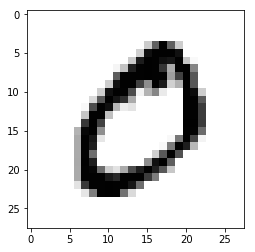

In [5]:
images = mnist.data.reshape((-1, 28, 28)) 
plt.imshow(images[0],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show() 


D’après l’image on peut visualiser le nombre 0, est-ce le cas ? Pour savoir la réponse on peut afficher la donnée descriptive convenable

In [6]:
print(mnist.target[0])

0.0


### Exploration d'autres jeux de données

A l’aide des mêmes étapes on peut visualiser d’autre DATASET par exemple le jeu de données WINE fourni par SKLEARN

In [7]:
from tabulate import tabulate

wine = datasets.load_wine()

values = wine.data
target = wine.target

newValues = []
newfeature = []
for i in range(5):
    newfeature.append(wine.feature_names[i])
newfeature.append("Target")

for j in range(len(values)):
    if j <= 15 :
        content = []
        for i in range(len(values[j])):
            if i < 5:
                content.append(values[j][i]) 
        content.append(target[j])
        newValues.append(content)      
    
print(tabulate(newValues, headers=newfeature,tablefmt="grid"))

+-----------+--------------+-------+---------------------+-------------+----------+
|   alcohol |   malic_acid |   ash |   alcalinity_of_ash |   magnesium |   Target |
+===========+==============+=======+=====================+=============+==========+
|     14.23 |         1.71 |  2.43 |                15.6 |         127 |        0 |
+-----------+--------------+-------+---------------------+-------------+----------+
|     13.2  |         1.78 |  2.14 |                11.2 |         100 |        0 |
+-----------+--------------+-------+---------------------+-------------+----------+
|     13.16 |         2.36 |  2.67 |                18.6 |         101 |        0 |
+-----------+--------------+-------+---------------------+-------------+----------+
|     14.37 |         1.95 |  2.5  |                16.8 |         113 |        0 |
+-----------+--------------+-------+---------------------+-------------+----------+
|     13.24 |         2.59 |  2.87 |                21   |         118 |    

## La méthode des k-nn

Dans cette partie on va commencer notre premier algorithme d’apprentissage superviser qui utilise le principe du plus proche voisin.

### Apprentissage

Tout d’abord on va couper notre jeu donné en deux parties ; la partie qui va servir pour l’apprentissage et l’autre pour l’entrainement. Pour cela on va utiliser la méthode « model_selection » avec une liste d’indice aléatoire pour bien mélanger nos données

In [27]:
data = np.random.randint(70000,size=5000)
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(mnist.data[data],mnist.target[data],train_size=0.8)

Maintenant on va créer un classifieur de type KNeighbors avec 10 voisins et ensuite on va l’entrainer.

In [9]:
clf = neighbors.KNeighborsClassifier(n_neighbors=10)

clf.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

Ensuite on va prédire l’image 4 de note dataset et la comparer avec la valeur cible.

[9.]


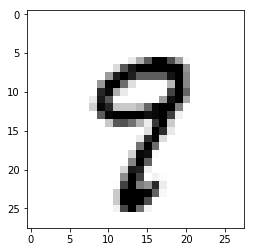

In [10]:
predicted = clf.predict(xtest[4].reshape(1, -1))

print(predicted)

images = xtest.reshape((-1, 28, 28)) 

plt.imshow(images[4],cmap=plt.cm.gray_r,interpolation="nearest") 
plt.show() 

On affiche le score de notre classifieur et aussi son taux d’erreur. Le taux d’erreur est de 6% ce qui est logique car on n’a pas fourni un grand nombre d’entré pour l’apprentissage.

In [11]:
print("Score :",clf.score(xtest, ytest))

ypredTest = clf.predict(xtest)

print("Erreur :",metrics.zero_one_loss(ytest, ypredTest))

Score : 0.932
Erreur : 0.06799999999999995


### Evaluation

Pour voire l’impact du nombre des voisins sur la précision du classifieur on effectue le code suivant.

In [28]:
scores = []

for k in range(2,15):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)

    clf.fit(xtrain,ytrain)

    score = clf.score(xtest, ytest)

    scores.append(score)

    print("Score for ",k,' : ',score)
    

Score for  2  :  0.918
Score for  3  :  0.929
Score for  4  :  0.918
Score for  5  :  0.915
Score for  6  :  0.915
Score for  7  :  0.908
Score for  8  :  0.913
Score for  9  :  0.909
Score for  10  :  0.91
Score for  11  :  0.906
Score for  12  :  0.908
Score for  13  :  0.912
Score for  14  :  0.909


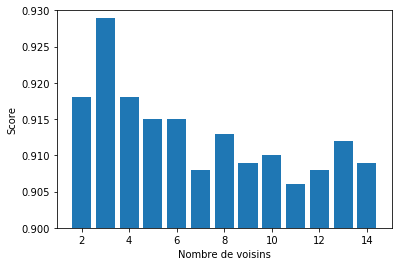

In [30]:
plt.bar(range(2,15),scores)
plt.xlabel('Nombre de voisins')
plt.ylabel('Score')
plt.ylim(0.9, 0.93)
plt.show()

On va voir maintenant est ce que la manière avec la quelle on découpe notre dataset influe sur précision.

In [14]:
KF = model_selection.KFold(n_splits=10,shuffle=True)
clf = neighbors.KNeighborsClassifier(n_neighbors=7)

data = np.random.randint(70000,size=15000)
X = mnist.data[data]

scoresKfold = []
for train_index, test_index in KF.split(X):
    clf.fit(mnist.data[train_index],mnist.target[train_index])
    score = clf.score(mnist.data[test_index], mnist.target[test_index])

    scoresKfold.append(score)

    print("Score for ",train_index,' : ',score)

Score for  [    0     1     2 ... 14996 14998 14999]  :  0.9873333333333333
Score for  [    0     2     3 ... 14997 14998 14999]  :  0.9926666666666667
Score for  [    0     1     2 ... 14997 14998 14999]  :  0.9906666666666667
Score for  [    0     1     2 ... 14996 14997 14999]  :  0.9873333333333333
Score for  [    0     1     2 ... 14997 14998 14999]  :  0.992
Score for  [    1     2     3 ... 14997 14998 14999]  :  0.992
Score for  [    0     1     3 ... 14997 14998 14999]  :  0.992
Score for  [    0     1     2 ... 14997 14998 14999]  :  0.9886666666666667
Score for  [    0     1     2 ... 14997 14998 14999]  :  0.9933333333333333
Score for  [    0     1     2 ... 14995 14997 14998]  :  0.9893333333333333


On peut constater que la manier avec la quelle on coupe ne joue pas un grand rôle.

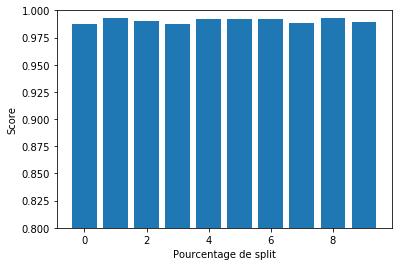

In [15]:
plt.bar(range(10),scoresKfold)
plt.xlabel('Pourcentage de split')
plt.ylabel('Score')
plt.ylim(0.8, 1)
plt.show()

D’après ce qui précède on a pu voir qu’avec un nombre de voisinage de 3 on a un bon score. Maintenant avec cette même valeur on va varier le pourcentage des échantillant.

In [31]:
data = np.random.randint(70000,size=5000)

scoresTraine = []
for percentage in np.arange(0.1, 1.0, 0.1):
    xtrain,xtest,ytrain,ytest = model_selection.train_test_split(mnist.data[data],mnist.target[data],train_size=percentage)
    clf = neighbors.KNeighborsClassifier(n_neighbors=3)
    clf.fit(xtrain,ytrain)
    score = clf.score(xtest, ytest)

    scoresTraine.append(score)

    print("Score for ",percentage,' : ',score)

Score for  0.1  :  0.8275555555555556
Score for  0.2  :  0.8735
Score for  0.30000000000000004  :  0.8868571428571429
Score for  0.4  :  0.9053333333333333
Score for  0.5  :  0.9168
Score for  0.6  :  0.9155
Score for  0.7000000000000001  :  0.924
Score for  0.8  :  0.921
Score for  0.9  :  0.946


Tant qu’on ajoute un grand nombre d’entrées pour le test plus on obtient de meilleures précisions. On remarque que le pourcentage 90% donne un meilleur résultat.

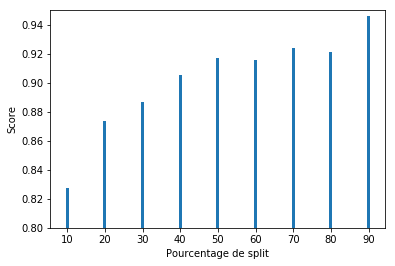

In [33]:
plt.bar(np.arange(10, 100, 10),scoresTraine)
plt.xlabel('Pourcentage de split')
plt.ylabel('Score')
plt.ylim(0.8, 0.95)
plt.show()

Maintenant on fait varier la valeur de la métrique de Minkowski.

In [18]:
data = np.random.randint(70000,size=5000)
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(mnist.data[data],mnist.target[data],train_size=0.9)

scoresMetric = []

for m in range(1,10):
    clf = neighbors.KNeighborsClassifier(n_neighbors=3,p=m)

    clf.fit(xtrain,ytrain)

    score = clf.score(xtest, ytest)

    scoresMetric.append(score)

    print("Score for ",m,' : ',score)

Score for  1  :  0.914
Score for  2  :  0.917
Score for  3  :  0.922
Score for  4  :  0.921
Score for  5  :  0.923
Score for  6  :  0.924
Score for  7  :  0.924
Score for  8  :  0.928
Score for  9  :  0.927


Cette métrique permet de donner un bon résultat pour ses différentes grandes valeurs. Au plus de 8 on a toujours le même score.

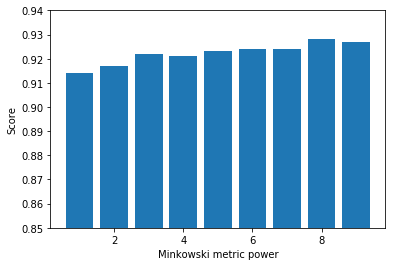

In [19]:
plt.bar(range(1,10),scoresMetric)
plt.xlabel('Minkowski metric power')
plt.ylabel('Score')
plt.ylim(0.85, 0.94)
plt.show()

Maintenant on fait varier la valeur de l’option n_job.

In [34]:
import time

data = np.random.randint(70000,size=5000)
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(mnist.data[data],mnist.target[data],train_size=0.9)

start = time.time()
clf = neighbors.KNeighborsClassifier(n_neighbors=3,n_jobs=1)
clf.fit(xtrain,ytrain)
end = time.time()
print("Pour 1 : ",end - start,"s")

start = time.time()
clf = neighbors.KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
clf.fit(xtrain,ytrain)
end = time.time()
print("Pour -1 : ",end - start,"s")

Pour 1 :  0.23331975936889648 s
Pour -1 :  0.21465277671813965 s


### Conclusion


D’après notre analyse de la méthode avec ses différentes options on remarque que cette dernière a un temps d’apprentissage qui est rapide et aussi simple à réaliser et manipuler.

En revanche la méthode est sensible vis-à-vis à la taille des jeux données, aussi que la prédiction prend un temps énorme.  